# Running problem

In [15]:
import pyvista as pv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

um_view_dir='/mofem_install/um_view'
bin_dir=um_view_dir + '/bin'
working_dir=um_view_dir + '/tutorials/vec-1'

plt.rcParams['figure.figsize'] = [15, 10]

## Data

- Young's modulus, E [$GPa$]
- Poissons ratio, $\nu$ 
- Material density, $\rho$ [$kg/m^{3}$]

In [2]:
YoungModulus=207
nu=0.3
rho=7829

## Preparing mesh

If you have mesh in native hd5 MOAB format, VTK, Cubit, gMesh, you can use such mesh directly. If you using mesh in MED format used by code-aster, you need to convert mesh into native MOAB hdf5 format.

In [3]:
#!cd {working_dir} && {bin_dir}/read_med \
#-med_file TET-2-0.med \
#-output_file fork-2-0.h5m; 
!ls

README.md	     fork-2-0_2parts.h5m  out_eig_2.h5m     screenshot_0.png
Untitled.ipynb	     fork-2-0_4parts.h5m  out_eig_3.h5m     screenshot_1.png
eiegn_elastic.ipynb  fork-2-0_4parts.vtk  out_eig_4.h5m     screenshot_2.png
eigen_elastic_2d     frequency_log	  out_part.vtk	    screenshot_3.png
eigen_elastic_3d     log		  param_file.petsc  screenshot_4.png
fork-0-5.h5m	     mesh.cub		  part.h5m
fork-1-0.h5m	     out_eig_0.h5m	  part_mesh.h5m
fork-2-0.h5m	     out_eig_1.h5m	  screenshot.png


# Partition mesh

If you would like run analysis on multiple-processors you need to partition mesh. You can do that using mofem tool to do that.

In [4]:
# Set number of processors
NumberOfCores=4

mesh_name='fork-2-0.h5m'
part_mesh='part_mesh.h5m'

# Parition mesh
!cd {working_dir} && {bin_dir}/mofem_part \
-my_file {mesh_name} \
-output_file {part_mesh} \
-nparts {NumberOfCores} -dim 3 -adj_dim 1

# Convert mesh to VTK format
!cd {working_dir} && {bin_dir}/mbconvert {part_mesh} out_part.vtk

# Print paritions
mesh = pv.read(working_dir+'/'+'out_part.vtk')
my_cmap = plt.cm.get_cmap("jet", 12)

mesh.plot(
    show_grid=True,
    show_edges=True,
    scalars="PARALLEL_PARTITION", 
    smooth_shading=False, 
    cmap=my_cmap)


[0] <inform> MoFEM version 0.10.1 (MOAB 5.2.1 Petsc Release Version 3.11.4, Sep, 28, 2019 )
[0] <inform> git commit id SHA1-NOT FOUND
[0] <inform> Local time: 2021-1-15 19:36:0
[0] <inform> UTC time: 2021-1-15 19:36:0
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316737 type BLOCKSET UNKNOWNNAME msId 1 name TET-2-0.unv
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316738 type BLOCKSET UNKNOWNNAME msId 2 name EL_Section
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316739 type BLOCKSET UNKNOWNNAME msId 3 name N_Section
[0] <inform> [mofem_part] meshset 12682136550675316737 type BLOCKSET UNKNOWNNAME msId 1 name TET-2-0.unv
[0] <inform> [mofem_part] meshset 12682136550675316738 type BLOCKSET UNKNOWNNAME msId 2 name EL_Section
[0] <inform> [mofem_part] meshset 12682136550675316739 type BLOCKSET UNKNOWNNAME msId 3 name N_Section
[0] <inform> [ProblemsManager] Finite elements in problem: row lower 0 row upper 2111 nb. elems 2111 ( 2111 )


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[(109.13957213699392, 127.50957106699391, 110.63957213699392),
 (0.0, 18.36999893, 1.5),
 (0.0, 0.0, 1.0)]

# Calculating eigen values

In [5]:
# Approximation order
order=1

# Tolerance
Tol=1e-3

# Number of eigen values to calculate
numberOfValuesToCalulate=5

# Clean previous solution
!cd {working_dir} && rm -vf out_eig_*

# Log file
log_file='log'

# Running code
!cd {working_dir} && \
{bin_dir}/mpirun --allow-run-as-root -np {NumberOfCores} ./eigen_elastic_3d \
-file_name {part_mesh} -eps_monitor -order {order} \
-eps_pos_gen_non_hermitian -eps_ncv 400 \
-eps_tol {Tol} -eps_nev {numberOfValuesToCalulate} -log_no_color 2>&1 | tee {log_file}

removed 'out_eig_0.h5m'
removed 'out_eig_1.h5m'
removed 'out_eig_2.h5m'
removed 'out_eig_3.h5m'
removed 'out_eig_4.h5m'
[0] <inform> MoFEM version 0.10.1 (MOAB 5.2.1 Petsc Release Version 3.11.4, Sep, 28, 2019 )
[0] <inform> git commit id SHA1-NOT FOUND
[0] <inform> Local time: 2021-1-15 19:36:2
[0] <inform> UTC time: 2021-1-15 19:36:2
[0] <inform> [example] Read mesh for problem in 3
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316738 type BLOCKSET UNKNOWNNAME msId 1 name TET-2-0.unv
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316739 type BLOCKSET UNKNOWNNAME msId 2 name EL_Section
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316740 type BLOCKSET UNKNOWNNAME msId 3 name N_Section
[0] <inform> [FieldCore] Add field U field_id 1 space H1 approximation base AINSWORTH_BERNSTEIN_BEZIER_BASE rank 3 meshset 12682136550675316743
[0] <inform> [FECore] Add finite element dFE
[0] <inform> [ProblemCore] Add problem SimpleProblem
[0] <infor

# Post process

[ 564.48779 1014.4379  2113.6251  2766.0932  3531.9555 ]
Mode  1  frequency  564.48779  Hz
Mode  2  frequency  1014.4379  Hz
Mode  3  frequency  2113.6251  Hz
Mode  4  frequency  2766.0932  Hz
Mode  5  frequency  3531.9555  Hz


Text(0, 0.5, 'Vibration mode')

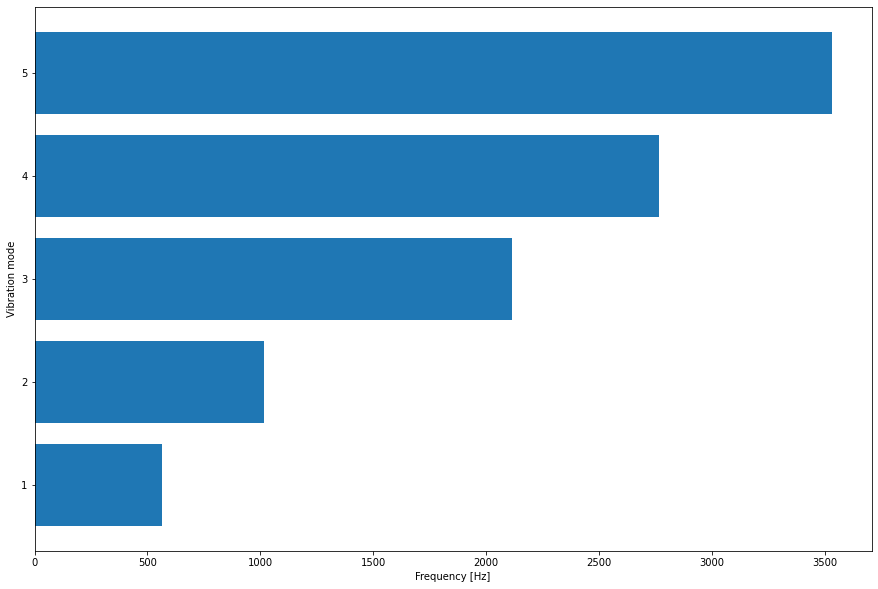

In [16]:
# Get frequencies 
frequency_log='frequency_log'
!cd {working_dir} && grep "frequency" {log_file} > {frequency_log} 
frequencies_data=pd.read_csv(working_dir+"/"+frequency_log,sep='\s+',header=None)
frequencies=frequencies_data[14].to_numpy()
print(frequencies)

for f in zip(range(1,numberOfValuesToCalulate+1),frequencies):
    print('Mode ',f[0],' frequency ',f[1],' Hz')
    
plt.barh(range(1,numberOfValuesToCalulate+1), frequencies, align='center')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Vibration mode')

In [13]:
# Convert files to VTK
out_files=!ls out_eig_*.h5m
for f in out_files:
    !cd {working_dir} && {bin_dir}/mbconvert {f} {f}'.vtk'

for f in range(0,numberOfValuesToCalulate):
    plot_mode=f
    plot_file=('%s/out_eig_%d.h5m.vtk') % (working_dir,plot_mode)
    print(plot_file)

    mesh = pv.read(plot_file)
    my_cmap = plt.cm.get_cmap("jet", 24)

    # Take a screen shot
    max_u = 0
    for u in mesh.point_arrays['U']:
        max_u=max(max_u, u[0]**2+u[1]**2+u[2]**2)

    max_u=np.sqrt(max_u)
    print('Max displacement ',max_u)

    mesh=mesh.warp_by_vector('U',factor=10/max_u)
    mesh.plot(
        screenshot=('%s/screenshot_%d.png') % (working_dir,plot_mode),
        show_grid=False,
        show_edges=False,
        scalars="U", 
        smooth_shading=False, 
        cmap=my_cmap)        

Read "out_eig_0.h5m"
Wrote "out_eig_0.h5m.vtk"
Read "out_eig_1.h5m"
Wrote "out_eig_1.h5m.vtk"
Read "out_eig_2.h5m"
Wrote "out_eig_2.h5m.vtk"
Read "out_eig_3.h5m"
Wrote "out_eig_3.h5m.vtk"
Read "out_eig_4.h5m"
Wrote "out_eig_4.h5m.vtk"
/mofem_install/um_view/tutorials/vec-1/out_eig_0.h5m.vtk
Max displacement  0.07640077575120363


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

/mofem_install/um_view/tutorials/vec-1/out_eig_1.h5m.vtk
Max displacement  0.08467251848486107


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

/mofem_install/um_view/tutorials/vec-1/out_eig_2.h5m.vtk
Max displacement  0.08305542135562587


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

/mofem_install/um_view/tutorials/vec-1/out_eig_3.h5m.vtk
Max displacement  0.09911897432227008


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

/mofem_install/um_view/tutorials/vec-1/out_eig_4.h5m.vtk
Max displacement  0.07826932109655896


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

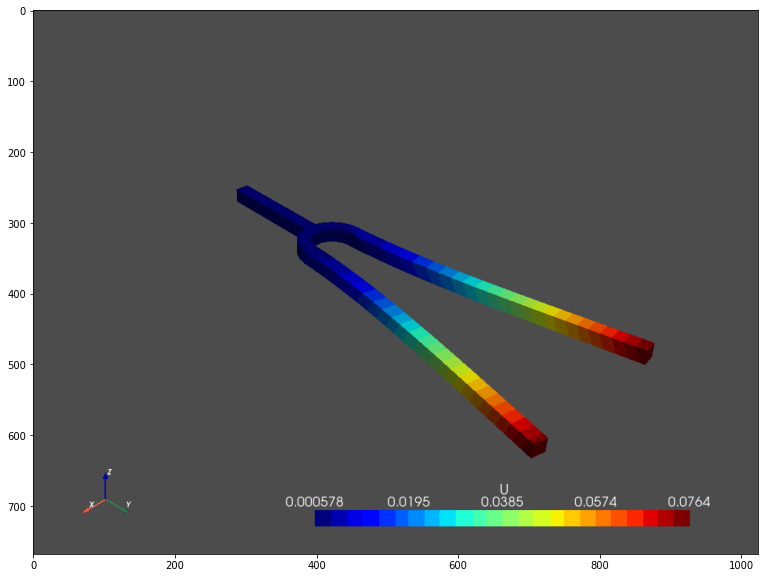

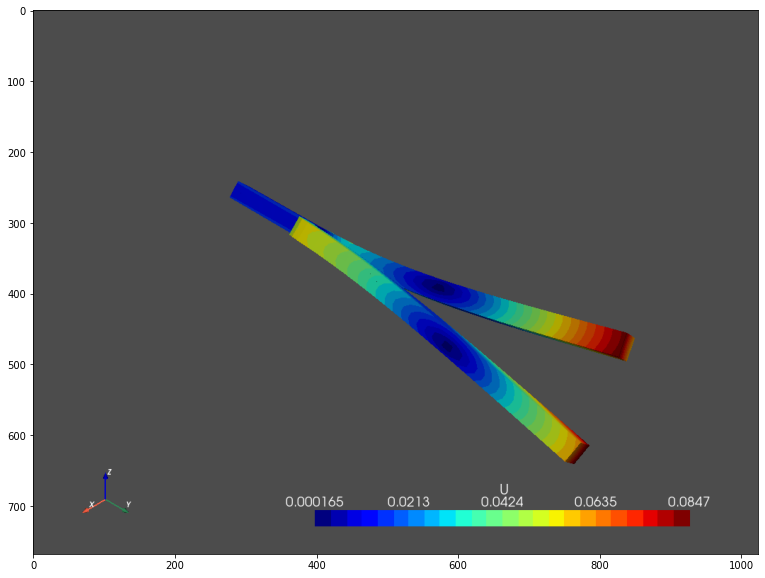

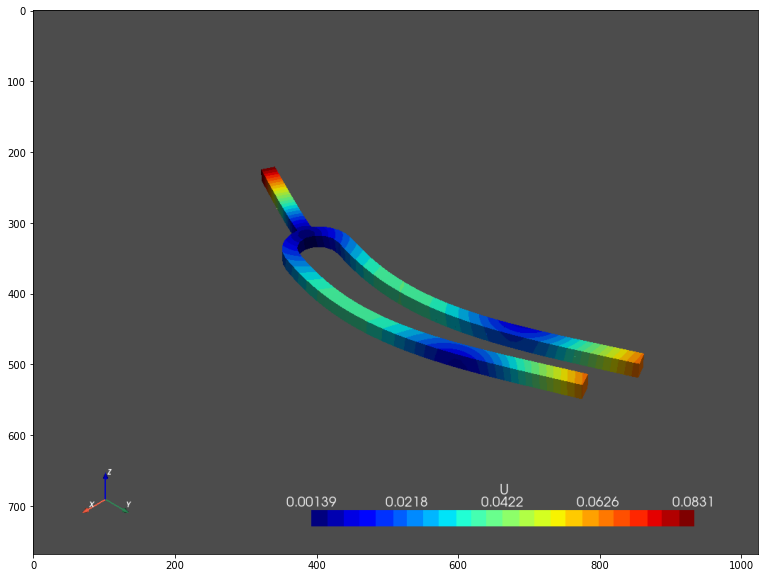

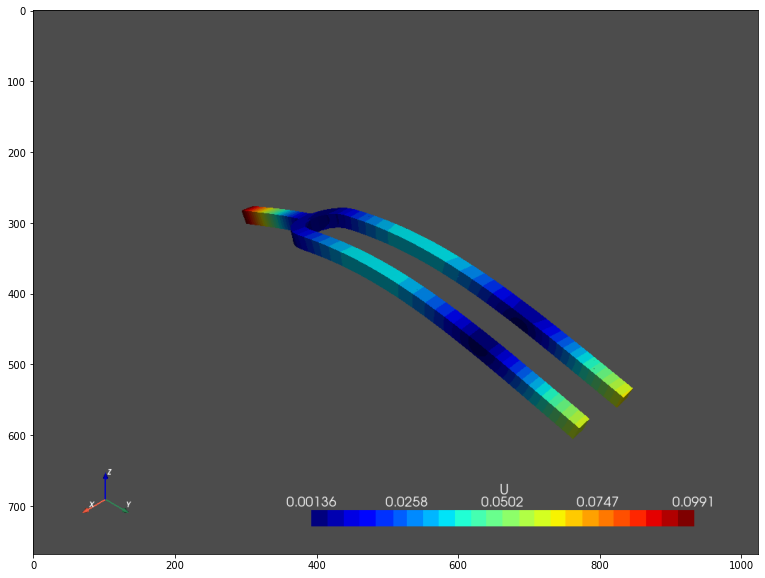

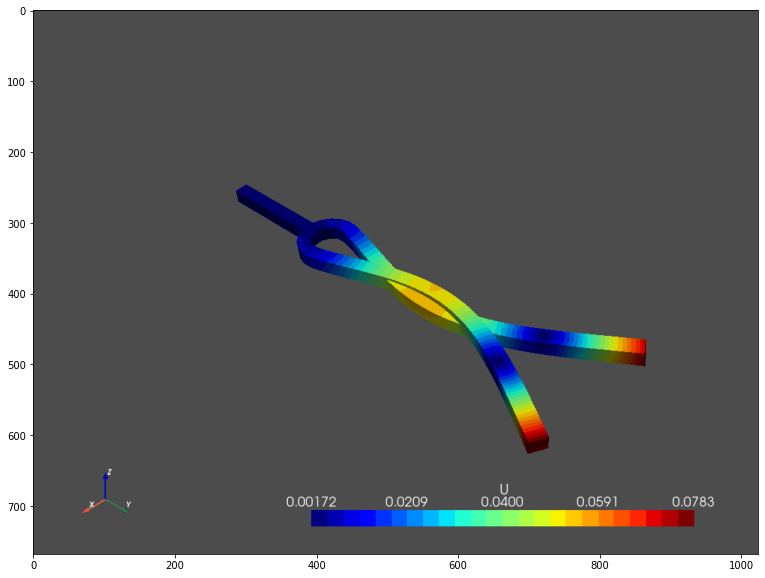

In [17]:
# Plot screan shots

for f in range(0,numberOfValuesToCalulate):
    screeen_shot=('%s/screenshot_%d.png') % (working_dir,f)
    img = mpimg.imread(screeen_shot)
    imgplot = plt.imshow(img)
    plt.show()
    

# Note

Example mesh and data were taken form [CoFEA](https://cofea.readthedocs.io/en/latest/benchmarks/000-tuning-fork/index.html)